# Unsupervised learning

Het probleem van supervised learning technieken is dat je steeds het resultaat ter beschikking moet hebben in de vorm van een label of een waarde.
Dit houdt in dat je vaak manueel de dataset moet overlopen om deze labelling te doen, bijvoorbeeld over alle beelden bij Computer Vision applicaties.
Vaak wordt dit dan door uitbesteed aan meerdere personen en die kunnen af en toe een fout maken waardoor de labelling ook niet altijd perfect is. 
Dit zorgt voor extra ruis in de dataset die het trainen van een model moeilijker maakt.

De tegenhanger van supervised learning is unsupervised learning waar niet-gelabelled data gebruikt wordt voor het uitvoeren van clustering 

Unsuperivised learning technieken worden gebruikt om te proberen niet-gelabelled data te structureren of te beschrijven.
Een aantal veel gebruikte toepassingen van unsuperivsed learning technieken zijn:
* Clustering
* Anomaly / Outlier Detection
* Dimensionality Reduction

In deze notebook gaan we focussen op de clustering toepassingen

## Clustering

In clustering toepassingen worden de beschikbare datapunten gegroepeert in groepen waar de gelijkenissen binnen de groep groter zijn dan tussen groepen.
Dit wordt in veel veschillende toepassingen gebruikt zoals 
* Gezichtsherkenning
* Gerelateerde zoekresultaten/producten
* Verdelen van je doelpubliek voor personalisering van reclame.
* Social Media Clustering om pagina's aan te raden die je zouden interesseren.
* Image segmentation

Meer informatie over de beschikbare implementaties van clustering algoritmes vind je [hier](https://scikit-learn.org/stable/modules/clustering.html).

In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# graphical
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets

%matplotlib inline

### K-Means Clustering

Het meest gekende algoritme voor clustering uit te voeren is het K-Means algoritme.
Dit algoritme vereist dat je zelf het aantal clusters kiest dat je verwacht in de dataset.
Hoe veel clusters zie je in onderstaande voorbeeld?
Hoe heb je dit bepaald?

<AxesSubplot:>

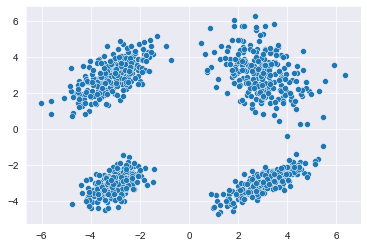

In [2]:
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                                    n_classes= 2, n_clusters_per_class=2, class_sep=3, random_state=200)

sns.scatterplot(x=X[:,0], y=X[:, 1])

We zagen deze clusters intuitief. 
Dit wordt echter zeer moelijk wanneer het aantal features/dimensies toeneemt.
Nu gaan we overlopen hoe het K-means clustering algoritme deze clustering uitvoert.
Het algoritme bestaat uit de volgende stappen:
* stap 1: Neem K willekeurige punten. Deze vormen de centrums van de beschikbare clusters en worden de centroids genoemd.
* stap 2: verdeel de datapunten in clusters op basis van de kleinste afstand tot de centroids.
* stap 3: verplaats de centroids naar het gemiddelde van alle punten in de cluster.
* stap 4: Herhaal stap 2 en 3 tot er geen verandering meer is.

**Merk op dat de schaal van de features belangrijk is omdat er met een afstand gewerkt wordt**

array([-6.02370931, -4.71619571])

array([[0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665],
       [0.19806286, 0.76053071]])

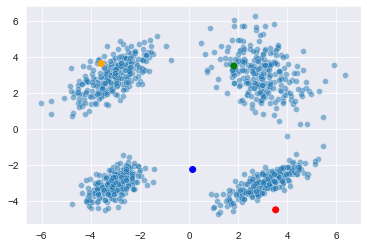

In [3]:
K=4
colors=['red','green','blue','orange']
X_max = np.max(X, axis=0)
X_min = np.min(X, axis=0)

# stap 1
np.random.seed(10) 
centroids = np.random.random(size=(4,2))
display(X_min)
display(centroids)
centroids = centroids * (X_max-X_min) + X_min
sns.scatterplot(x=X[:,0], y=X[:, 1], alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], color=colors)

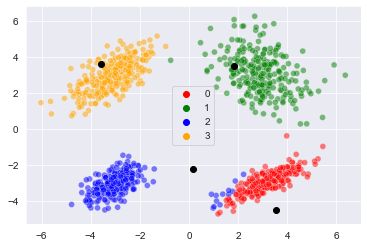

In [4]:
# stap 2
def calc_cluster(row):
    min_dist = 100000000
    best_cluster = -1
    for i in np.arange(K):
        dist = (row[0] - centroids[i, 0])**2 + (row[1] - centroids[i, 1])**2
        if dist < min_dist:
            min_dist = dist
            best_cluster = i
    
    return best_cluster
    

clusters = np.apply_along_axis(calc_cluster, axis=1, arr=X )

sns.scatterplot(x=X[:,0], y=X[:, 1], alpha=0.5, hue=clusters, palette=colors)
plt.scatter(centroids[:,0], centroids[:,1], color='black')

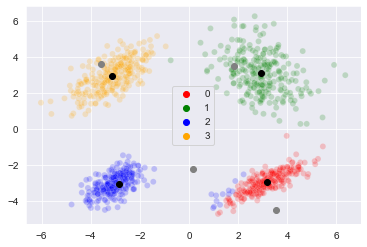

In [5]:
# stap 3
def calc_new_centroids(X, centroids, clusters):
    new_centroids = np.zeros(shape=centroids.shape)
    for i in np.arange(K):
        if np.sum(clusters ==i) > 0:
            new_centroids[i] = X[clusters ==i].mean(axis=0)
    return new_centroids

new_centroids = calc_new_centroids(X, centroids, clusters)

sns.scatterplot(x=X[:,0], y=X[:, 1], alpha=0.2, hue=clusters, palette=colors)
plt.scatter(centroids[:,0], centroids[:,1], color='gray')
plt.scatter(new_centroids[:,0], new_centroids[:,1], color='black')

Number of iterations: 2


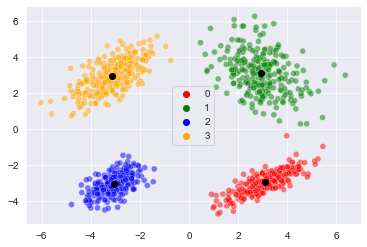

In [6]:
# stap 4
iterations = 0
while (centroids != new_centroids).all():
    centroids = new_centroids
    clusters = np.apply_along_axis(calc_cluster, axis=1, arr=X )
    new_centroids = calc_new_centroids(X, centroids, clusters)
    
    iterations+= 1
    
print("Number of iterations:", iterations)
sns.scatterplot(x=X[:,0], y=X[:, 1], alpha=0.5, hue=clusters, palette=colors)
plt.scatter(centroids[:,0], centroids[:,1], color='black')

Dit was de manuele manier om dit uit te voeren.
Gelukkig kan dit ook gedaan worden met sklearn door gebruik te maken van de [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans) klasse.

Via bovenstaande manier is het duidelijk dat het KMeans algoritm gemakkelijke te implementeren en interpreteren is.
Er zijn echter een aantal situaties waar er extra aandacht vereist is.
Het is echter niet altijd gegarandeerd dat het algoritme de optimale oplossing geeft.
Daarnaast kan de oplossing ook beinvloed worden door de beginsituatie.
Om de impact hiervan te minimaliseren kan je voor elke combinatie van hyperparameters een aantal modellen laten genereren.
Een andere oplossing is om de punten niet random te kiezen maar de centroids zo veel mogelijk te spreiden.
Een derde oplossing is om de centroids te plaatsen op punten van de dataset.

Ook is het model gevoelig aan outliers omdat deze zogezegd tot de andere cluster dan gaan horen.
Het gebruik van een eenvoudige afstand heeft ook zijn probleem situaties.
Dit komt overeen met situaties van SVM waar de data niet lineair scheidbaar was.
De oplossing hiervan is hetzelfde.
Je kan namelijk een kernel gebruiken die de punten projecteert in een hogere dimensie en waar de afstand dan wel gebruikt kan worden.

<AxesSubplot:>

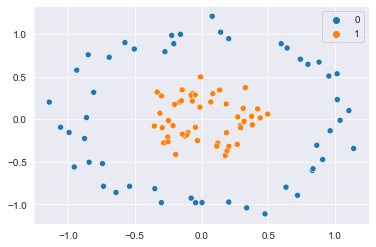

In [8]:
X2, y2 = datasets.make_circles(noise=0.1, random_state=1111, factor=0.3)
sns.scatterplot(x=X2[:,0], y=X2[:, 1], hue=y2)

In het voorbeeld dat we hier uitgewerkt hebben konden we op het zicht bepalen dat er 4 of 2 clusters gingen zijn.
Dit gaat echter niet altijd mogelijk zijn wanneer het aantal features/dimensies toeneemt.
Het optimale aantal clusters kan op een aantal manieren bepaald worden:
* Silhouette clustering
* Elbow method



Num clusters 1


C:\Users\jens.baetens3\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Num clusters 2
Num clusters 3
Num clusters 4
Num clusters 5
Num clusters 6
Num clusters 7


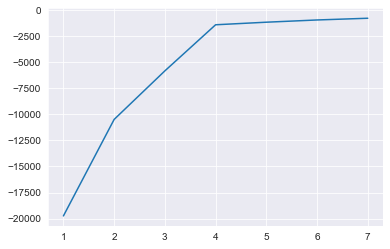

In [7]:
from sklearn.cluster import KMeans

Ks=[1,2,3,4,5,6,7]
scores = []

for K in Ks:
    print("Num clusters", K)
    kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
    scores.append(kmeans.score(X))
    
plt.plot(Ks, scores)
    

### Hierarchical clustering

Bij hierarchical clustering wordt er getracht om een clusterstructuur op te bouwen. Dit wil dus zeggen dat je voor elk aantal clusters een bepaalde verdeling van de dataset bekomt.
De methoden voor deze vorm van clustering kunnen in twee verdeeld worden. Namelijk 
* Agglomeratief of bottom-up
* Divise of top-down

De voordelen van hierarchical clustering is dat je op elk moment kan stoppen in het algoritme en dus zo elk gewenst aantal clusters kan bekomen.
Ook kan de resulterende structuur van clusters handig zijn, bijvoorbeeld voor productcategorieen samen te stellen of in de biologie.

### Agglomerative Hierarchical clustering

Bij agglomeratieve methoden wordt er begonnen van alle datapunten. 
De twee dichtste punten worden samengevoegd tot twee clusters. 
Daarna worden de volgende twee dichtste punten\clusters samengevoegd tot 1 clusters. 
Dit proces gaat door tot er nog maar 1 cluster overblijft.
Hierbij is het belangrijk om op te merken dat er verschillende metrieken mogelijk zijn om de afstand tussen twee clusters te bepalen, bijvoorbeeld:
* maximum afstand tussen een punt uit elke cluster
* minimum afstand tussen een punt uit elke cluster
* de gemiddelde afstand tussen elk punt uit de ene cluster en elk punt uit de andere cluster
* ...

Merk op dat je voor deze metrieken te berekenen steeds elk element van een cluster moet vergelijken met elk element van een andere cluster.
Dit wordt dus snel zeer rekenintensief, minstens kwadratisch met het aantal datapunten.

### Divisive hierarchical clustering

Bij dit type van hierarchical clustering vertrekken we van 1 cluster en zoeken we naar de beste manier om deze cluster te verdelen in twee.
Daarna doen we hetzelfde voor elk van de twee volgende clusters en zo verder tot er slechts 1 element in elke cluster aanwezig is.
Omdat er zoveel mogelijke manieren zijn om elke cluster te splitsen worden er gebruik gemaakt van heuristieken in deze methode.
Het basis algoritme hiervan wordt DIANA genoemd maar we gaan hier niet dieper op in.

## Mean-Shift Clustering

Een laatste manier die ik aanhaal voor clustering uit te voeren is de mean-shift clustering.
Dit is een algoritme dat rechtstreeks op zoek gaat naar het middelpunt van elke cluster door het middelpunt te verplaatsen naar het middelpunt van alle datapunten binnen een bepaalde afstand van het huidige middelpunt (centroid).
Meer informatie en een animatie van hoe dit algoritme in zijn werk gaat kan je [hier](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68) vinden.
Het algoritme bestaat uit de volgende stappen:
* Neem x aantal punten uniform verdeeld over de featureset
* Voor elk punt, zoek naar alle datapunten die vallen binnen een straal R (**het sliding window**) en bereken het middelpunt
* Verplaats de punten naar hun middelpunt en herhaal het vorige tot er convergentie is.
* Wanneer het sliding window van verschillende centroids overlapt (afstand kleiner dan 2R), dan blijft enkel het punt met het hoogste aantal punten binnen zijn sliding window over
* Er blijven K aantal punten over die de centers zijn van de clusters

Het grote voordeel van deze techniek is dat er geen nood is om te optimaliseren op het aantal clusters aangezien dit door het algoritme bepaald wordt.
Wel speelt de straal R van het sliding window een grote rol en kan een grote impact hebben op het aantal en de locatie van de clusters.

number of estimated clusters : 4


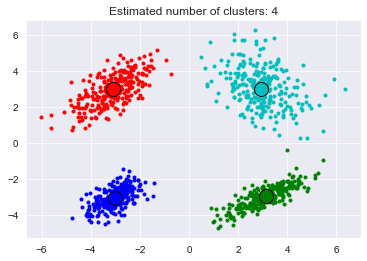

In [8]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = 2
#bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Oefening

Voer clustering uit voor de dataset die je [hier](https://www.kaggle.com/hellbuoy/online-retail-customer-clustering) kan vinden.
* Verwijder rijen die null waarden bevatten
* Zet de dataset om naar een dataset die per klant bijhoudt van welk land de klant afkomstig is (origin), aantal keer dat de klant iets gekocht heeft (numPurchases), totaal aantal bedrag gekocht (TotalAmount), tijd sinds laatste aankoop (TimePassed) 
* Voer K-Means clustering uit voor een zelf gekozen aantal clusters (minstens 3) op deze dataset en bereken de score.
* Merk op dat de schaal van de bovenstaande kolommen niet consistent is. Zet alle kolommen op dezelfde schaal door gebruik te maken van de StandardScaler.
* Voer opnieuw K-Means clustering uit met hetzelfde aantal clusters als hierboven op deze aangepaste dataset en vergelijk de score met de vorige. Verklaar het resultaat.
* Ga nu op zoek naar het optimaal aantal clusters door middel van de elbow methode
* Voer nu ook clustering uit door middel van Mean Shift Clustering. Is het aantal clusters bekomen met deze techniek gelijkaardig aan het beste aantal voor K-Means.
* Print nu een twintig-tal aantal rijen uit met hun labels (deze bekom je via: model.labels_). Kan je visueel zien welke parameters gebruikt zijn voor de clustering? Verklaar je antwoord.